#  Flow Toxicity 

This jupyter notebook uses two methods to measure trading flow toxicity. 

- <b> VPIN </b> uses homogeneous volume bucket to meature informed trading.

First of all, I aggregated raw trades to 1-min volume bucket. One trade might be split to multiple fixed-size volume bucket. Change of last price in each time bucket will be calculated. The price change will be normanized by the sample standard deviation. Assuming price change follows a normal distribution, I split volume in the 1-minute bucket by buy ( 1-minute volume * probability of buy)  and sell ( 1-minute volume * probability of sell). The 1-minute time bucket will then be aggregtaed into volume buckets for the fixed size e.g. 800 coins. Toxicity will be calculated as bid and ask imbalance in each volume bucket.
- <b> PIN </b>
This method measures informed trading in clock time. It assumes trades come in with Possion process. 
   - informed trades at probability <i> alpha </i>
   - bad news comes in with the probability <i> delta </i>
   - non-informed buy/sell with probability <i> epsilon_buy </i> and  <i> epsilon_sell </i>
   - informed trading with intensity <i> miu </i>

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import pearsonr,spearmanr
import math
import matplotlib.pyplot as plt 
import scipy.stats
from scipy.optimize import minimize
from numpy_ext import rolling_apply as rolling_apply_ext
from toxicity import pin,vpin
import warnings
warnings.filterwarnings('ignore')

## 1 Volume Synchronized Probability of Informed Trading (VPIN)

- trade side assinged by bulk price change in each time bucket assuming normal distribution of trade side

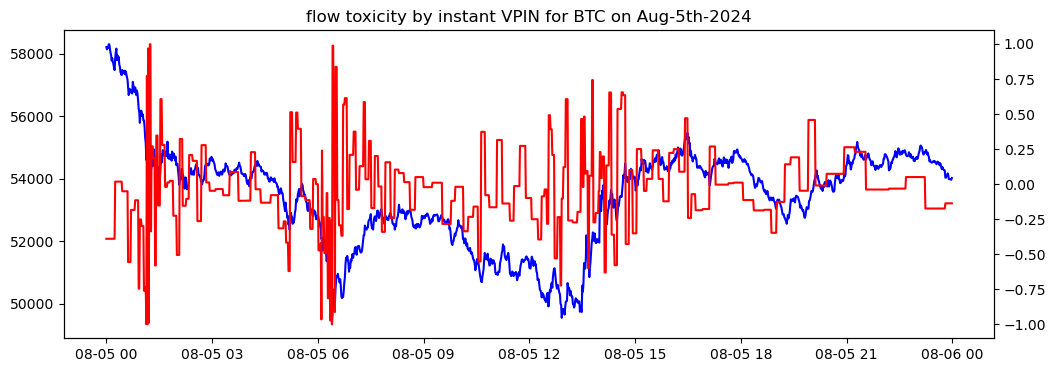

In [2]:
my_engine = vpin.vpin(".\data\BTCUSDT-trades-2024-08-05.csv")
df_vpin = my_engine.calc()

fig,ax1 = plt.subplots(figsize=(12,4))
ax1.plot(df_vpin['price'],color='b')
ax1.set_title('flow toxicity by instant VPIN for BTC on Aug-5th-2024')

ax2 = ax1.twinx() 
ax2.plot(df_vpin['toxicity'],color='r');

## 2 probability of information-based trading (PIN)

Note due to technical issues, the optimization routine might not find solution sometimes.

- trade size by <b> is_buyer_maker </b> from exchange
- assume daily informed trading probability <b> alpha </b>
- informed trader with flow intensity <b> miu </b>
- non-informed trader with buy flow following a posson process intensity <b> epsilon_buy </b>
- non-informed trader with sell flow following a posson process intensity <b> epsilon_sell </b>
- bad news probability <b> delta </b>, good news probability  <b> 1- delta </b>

In [3]:
my_flow = pin.pin("data\BTCUSDT-trades-2024-08-05.csv")
df_pin = my_flow.calc()

                              buy_qty  sell_qty     price
datetime                                                 
2024-08-05 00:00:00 2286     18.93406  14.57513  58208.01
2024-08-05 00:01:00 4012      9.45213   7.82100  58136.01
2024-08-05 00:02:00 5502      7.84551   5.41335  58209.43
2024-08-05 00:03:00 6845      6.84821   7.74840  58182.01
2024-08-05 00:04:00 8465     12.29992   3.62264  58298.01
...                               ...       ...       ...
2024-08-05 23:55:00 7560536  13.03851  39.76171  53987.99
2024-08-05 23:56:00 7562312  12.17710  15.25871  53982.01
2024-08-05 23:57:00 7565100  15.16110  31.26169  53978.41
2024-08-05 23:58:00 7566771  10.92782   9.75135  53962.00
2024-08-05 23:59:00 7568496  16.98780  17.97603  54018.81

[1440 rows x 3 columns]
[0.58933391 0.60954441 2.15526774 2.18616933 2.09579968]
[0.59038761 0.60859985 2.15266392 2.19307097 2.09381994]
[0.59147419 0.6072103  2.14547723 2.20721272 2.08860155]
[0.5923514  0.60583594 2.14150117 2.21492017 2.086

Clearly, the day shows elevated informed trading, the blue line, touching highest probability multiple times during the day. Noticebly, the informed trading probability coincides with bad news probability. 

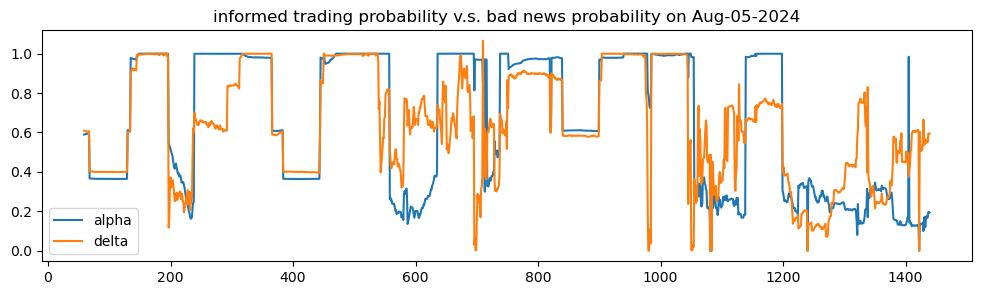

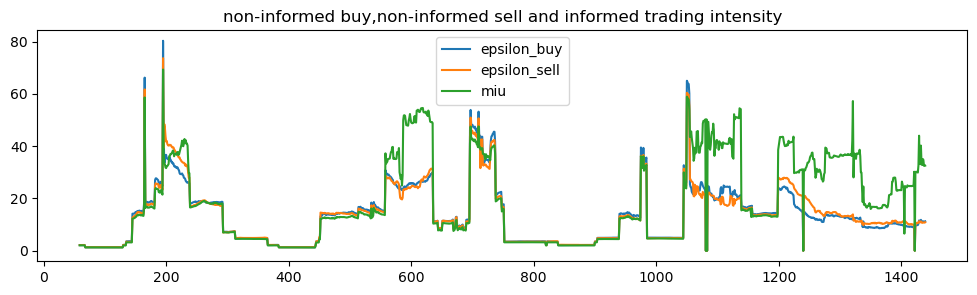

In [4]:
df_pin[['alpha','delta']].plot(figsize=(12,3),title='informed trading probability v.s. bad news probability on Aug-05-2024');
df_pin[['epsilon_buy','epsilon_sell','miu']].plot(figsize=(12,3),title='non-informed buy,non-informed sell and informed trading intensity');